In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
import numpy as np
from time import time

In [12]:
def harmonic_potential(xy):
    return np.sum(xy**2) / 2

In [13]:
def grad_harmonic_potential(xy):
    return np.array(xy)

In [14]:
"""
position r
momentum p
time step dt
mass m
"""
def velocity_verlet_step(r, p, dt, m):
    r_new = r + dt / m * p - 0.5 * dt**2 / m * grad_harmonic_potential(r)
    p_new = p - dt / 2 * (grad_harmonic_potential(r) + grad_harmonic_potential(r_new))
    return r_new, p_new

In [15]:
def velocity_verlet(r_ini, p_ini, dt = 0.01, m = 1, steps = 10):
    pos = np.zeros([steps + 1, 2])
    pos[0] = r_ini
    momenta = np.zeros([steps + 1, 2])
    momenta[0] = p_ini
    for i in range (0, steps):
        pos[i+1], momenta[i+1] = velocity_verlet_step(pos[i], momenta[i], dt, m)  
    return pos, momenta

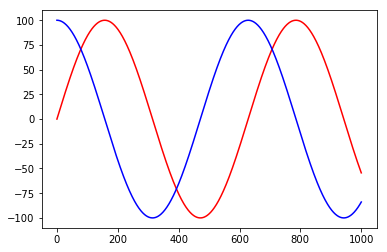

In [17]:
r_ini = np.array([1,0])
p_ini = np.array([0,100])
number_steps = 1000

#plot x positon and momentum
plt.plot(velocity_verlet(r_ini, p_ini, steps = number_steps)[0][:,1], '-', color='red')
plt.plot(velocity_verlet(r_ini, p_ini, steps = number_steps)[1][:,1], '-', color='blue')

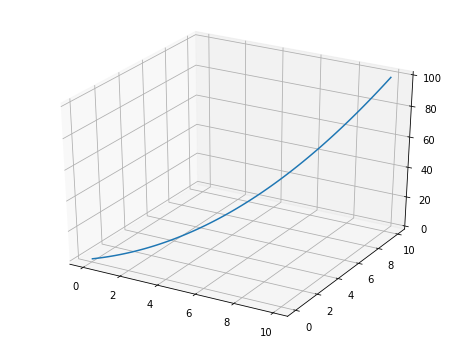

In [21]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection = '3d')

X = np.linspace(0, 10, 10000)
Y = np.linspace(0, 10, 10000)

Z = (X**2 + Y**2) / 2

p = ax.plot_wireframe(X, Y, Z, rstride=40, cstride=40)

#X, Y, Z = get_test_data(0.05)
#ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)